In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('ad_10000records.csv')
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,AdTopicLine,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1


In [7]:
data.shape

(10000, 10)

In [8]:
data.info

<bound method DataFrame.info of       Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        62.26  32.0     69481.85                172.83   
1                        41.73  31.0     61840.26                207.17   
2                        44.40  30.0     57877.15                172.83   
3                        59.88  28.0     56180.93                207.17   
4                        49.21  30.0     54324.73                201.58   
...                        ...   ...          ...                   ...   
9995                     41.73  31.0     61840.26                207.17   
9996                     41.73  28.0     51501.38                120.49   
9997                     55.60  39.0     38067.08                124.44   
9998                     46.61  50.0     43974.49                123.13   
9999                     46.61  43.0     60575.99                198.45   

                                 AdTopicLine             City  Gend

In [11]:
plot_df = data.AdTopicLine.value_counts()
plot_df

Cloned explicit middleware                 344
Streamlined homogeneous analyzer           212
Business-focused transitional solution     207
Sharable reciprocal project                187
Intuitive exuding service-desk             173
                                          ... 
Ergonomic neutral portal                     1
Implemented uniform synergy                  1
Visionary multi-tasking alliance             1
Inverse zero tolerance customer loyalty      1
Reactive interactive protocol                1
Name: AdTopicLine, Length: 559, dtype: int64

In [13]:
plot_df = data.City.value_counts()
plot_df

Hubbardmouth       336
West Brandonton    275
Lisafort           261
Wintersfort        230
Stewartbury        207
                  ... 
Turnerview           1
North Tiffany        1
North Kristine       1
East Troyhaven       1
Davidview            1
Name: City, Length: 521, dtype: int64

In [14]:
plot_df = data.Country.value_counts()
plot_df

Australia                                       388
Czech Republic                                  330
Turkey                                          312
Qatar                                           224
Hong Kong                                       221
                                               ... 
South Georgia and the South Sandwich Islands      1
Wallis and Futuna                                 1
Sierra Leone                                      1
Niue                                              1
Paraguay                                          1
Name: Country, Length: 207, dtype: int64

<AxesSubplot: >

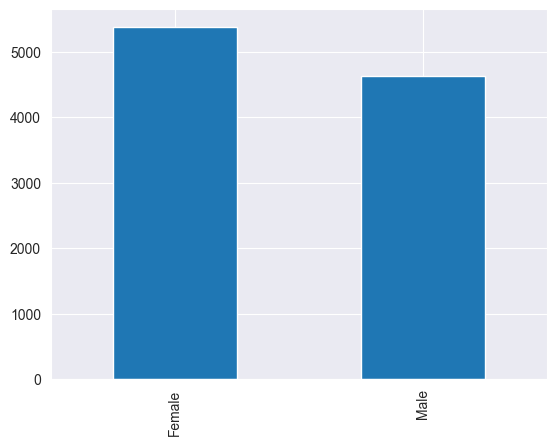

In [15]:
plot_df = data.Gender.value_counts()
plot_df.plot(kind="bar")

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

# Assuming the text data is in the 'text' column
text_data = data['AdTopicLine'].tolist()

# Vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Cluster the text data using DBSCAN
model = DBSCAN(eps=0.5, min_samples=2)
labels = model.fit_predict(X)

# Group the text data by cluster
groups = [[] for _ in set(labels)]
for i, label in enumerate(labels):
    groups[label].append(text_data[i])

# Add the groups as a new column to the original dataset
data['group'] = labels

data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,AdTopicLine,City,Gender,Country,Timestamp,Clicked on Ad,group
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,1
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,2
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,3
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1,256
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0,61
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0,15
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1,169


In [17]:
data.group.value_counts()

47     344
40     212
43     207
52     187
15     173
      ... 
360      2
356      2
353      2
349      2
448      2
Name: group, Length: 450, dtype: int64